**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import KDTree

class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.k = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        self._X = X
        self._y = y
        
    def predict(self, X):
        if self.algorithm == 'brute':
            indices = np.argpartition(cdist(X, self._X), self.k, axis=1)[:,:self.k]
        elif self.algorithm == 'kd_tree':
            tree = KDTree(self._X)
            _, indices = tree.query(X, k=self.k)
        y = np.apply_along_axis(lambda line: np.bincount(line).argmax(), 1, self._y[indices])
        #y = np.array([np.bincount(line).argmax() for line in self._y[indices]])
        return y

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
accuracy_score(y_test, my_clf_pred)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"


**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

Wall time: 993 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [10]:
%time clf.predict(X_test)

Wall time: 1.98 ms


array([0, 0, 1, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1])

In [11]:
%time my_clf.predict(X_test)

Wall time: 0 ns


array([0, 0, 1, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1], dtype=int64)

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [15]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [16]:
%time clf.predict(X_test)

Wall time: 993 µs


array([1, 1, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0])

In [17]:
%time my_clf.predict(X_test)

Wall time: 0 ns


array([1, 1, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0], dtype=int64)

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
v = CountVectorizer(max_features=1000)

In [23]:
X = v.fit_transform(data) 

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [24]:
from sklearn.model_selection import KFold

In [25]:
kf = KFold(n_splits=3, random_state=None, shuffle=False)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

Wall time: 1min 9s


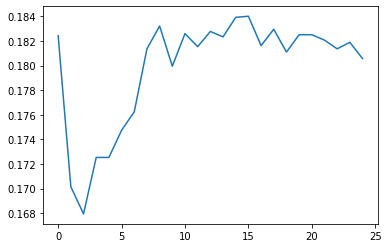

In [26]:
%%time

accuracy = []
for k in range(1, 26):
    a = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = target[train_index], target[test_index]
        
        clf = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
        clf.fit(X_train.toarray(), y_train)
        y_pred = clf.predict(X_test.toarray())

        a.append(accuracy_score(y_test, y_pred))
    accuracy.append(sum(a)/3)

plt.plot(accuracy)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
v = TfidfVectorizer(max_features=1000)

In [29]:
X = v.fit_transform(data)

Wall time: 1min 23s


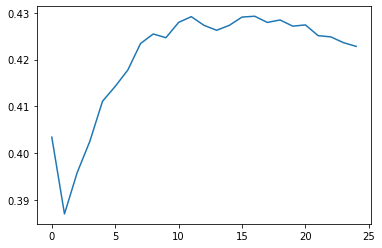

In [30]:
%%time

accuracy = []
for k in range(1, 26):
    a = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = target[train_index], target[test_index]
        
        clf = KNeighborsClassifier(n_neighbors=k, algorithm='brute', metric='cosine')
        clf.fit(X_train.toarray(), y_train)
        y_pred = clf.predict(X_test.toarray())

        a.append(accuracy_score(y_test, y_pred))
    accuracy.append(sum(a)/3)

plt.plot(accuracy)

In [31]:
best_clf = KNeighborsClassifier(n_neighbors=12, algorithm='brute', metric='cosine')
best_clf.fit(X.toarray(), target)

KNeighborsClassifier(algorithm='brute', metric='cosine', n_neighbors=12)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [32]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [33]:
test_data = newsgroups['data']
test_target = newsgroups['target']

In [34]:
test_X = v.fit_transform(test_data)

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [35]:
test_pred = best_clf.predict(test_X.toarray())
accuracy_score(test_target, test_pred)

0.07952734997344663